<H2>Customer segmentation with K-MEANS</H2>
<p>in this notebook we are working on customer segmentation on the database of a mall to classify their customers into groups getting insights that can help the marketing team to come up with plan wisely.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.drop(columns='CustomerID', axis=1, inplace=True)

In [6]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [69]:
df.rename(columns={"Gender":"gender","Age":"age","Annual Income (k$)":"income","Spending Score (1-100)":"score"},inplace=True)

Text(0.5, 1.0, 'GENDER X SCORE')

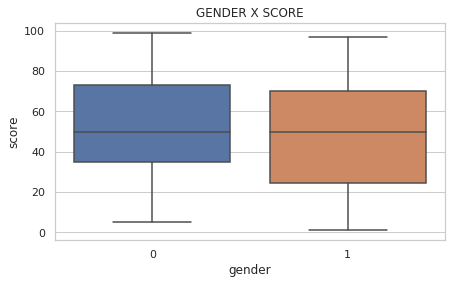

In [70]:
plt.figure(figsize=(7,4))
sns.set(style="whitegrid")
sns.boxplot(x='gender',y='score', data=df)
plt.title("GENDER X SCORE")

Text(0.5, 1.0, 'Age X SCORE')

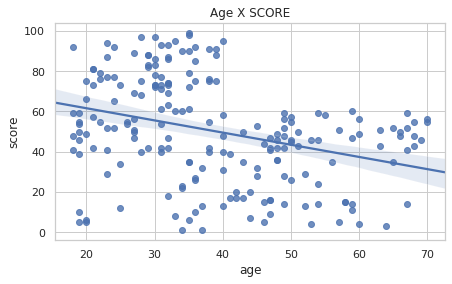

In [11]:
plt.figure(figsize=(7,4))
sns.regplot(x='age',y='score', data=df)
plt.title("Age X SCORE")

Text(0.5, 1.0, 'Income X SCORE')

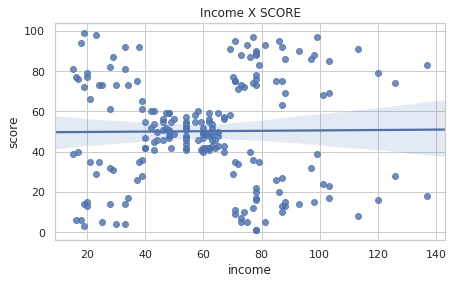

In [126]:
plt.figure(figsize=(7,4))
sns.regplot(x='income',y='score', data=df)
plt.title("Income X SCORE")

In [11]:
df['gender'].value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [12]:
df.corr()

,age,income,score
age,1.000000,-0.012398,-0.327227
income,-0.012398,1.000000,0.009903
score,-0.327227,0.009903,1.000000


<h2>Label Encoder and Data Normalization</h2>
<p>As gender is a categorical feature and may be of high value for our algorithm we need to use label encodering to transform the column into numerical categories.</br>
Lets also apply data normalization to our dataframe as the distribuition is large in our features.
</p>


In [125]:
le = LabelEncoder()
le.fit(df['gender'])
df['gender'] = le.transform(df['gender'])

In [124]:
x = df[['age','gender','income','score']]
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


<H2>How Many clusters should we have?</H2>
<p>Here we use the  elbow techinique to find out how many clusters we should have before creating our machine learning object and passing in the parameter number of clusters. It's clear that 4 is the right number.</p>

In [74]:
errors = []
for i in range(1,10):
    k = KMeans(n_clusters=i, init='k-means++')
    k.fit(x)
    errors.append(k.inertia_)

Text(3.8, 350, 'N')

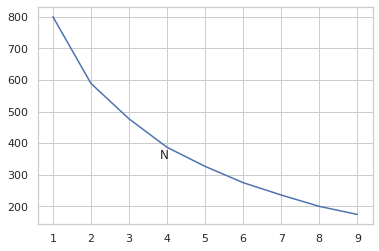

In [123]:
plt.plot(range(1,10),errors)
plt.annotate('N',xy=(3.8,350))

In [76]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [120]:
#get the labels and centroids from machine learning algorithm K-MEANS
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [119]:
#Apply the labels to the dataframe
df['cluster'] = labels

<h2>Score Distribuition  by clusters</h2>
<p>It's noticeable through this boxplot that the clusters 1 and 3 have a distribuition superior than the others, we can also see that cluster 1 has a minimum higher, both have a medium around the same point and 75% quartile of cluster 1 is from 70 to 90 points while cluster 3 is 70 to 80. They are quite similiar in some aspects but its obvius at this point that customers belonging to clusters 0 and 2 are not our target here.</p>

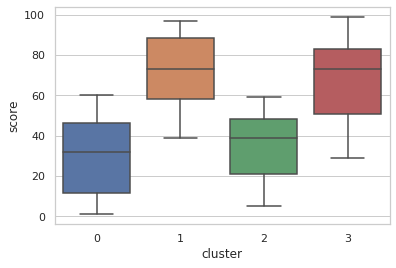

In [118]:
sns.boxplot(x='cluster',y='score',data=df)

<h2>Data Visualization</h2>
<p>Now that we know that both clusters 1 and 3 differ significantly from the the other clusters on customer spending score, lets visualize the age and income of the customers belonging to those clusters.</p>

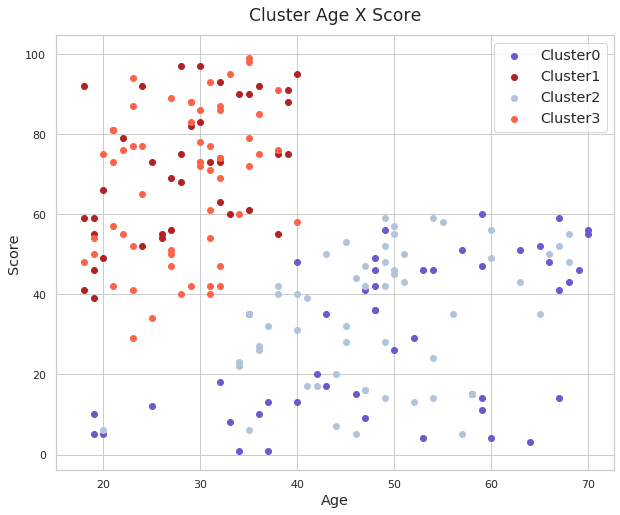

In [108]:
colors = ['slateblue','firebrick','lightsteelblue','tomato']
clusters = df['cluster'].unique()
plt.figure(figsize=(10,8))
for i, col in zip(range(len(centroids)),colors):
    members = df['cluster'] == i
    centroid = centroids[i]
    plt.scatter(df[members]['age'],df[members]['score'],c = col, label='Cluster{}'.format(i))
plt.ylabel('Score', fontsize='large')
plt.xlabel('Age', fontsize='large')
plt.title('Cluster Age X Score', fontsize='x-large', y=1.020)
plt.legend(loc='upper right', fontsize='large')    

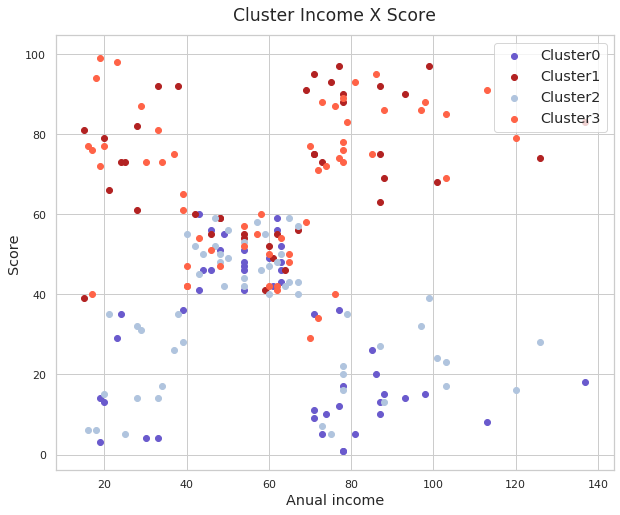

In [117]:
colors = ['slateblue','firebrick','lightsteelblue','tomato']
clusters = df['cluster'].unique()
plt.figure(figsize=(10,8))
for i, col in zip(range(len(centroids)),colors):
    members = df['cluster'] == i
    centroid = centroids[i]
    plt.scatter(df[members]['income'],df[members]['score'],c = col, label='Cluster{}'.format(i))
plt.ylabel('Score', fontsize='large')
plt.xlabel('Anual income', fontsize='large')
plt.title('Cluster Income X Score', fontsize='x-large', y=1.020)
plt.legend(loc='upper right', fontsize='large')    

<h2>Analysis on the cluster 3</h2>
<p>After the visual and mathematical analysis on the cluster 3 we have defined its members to have:</p>
<ul>
  <li>Age Between 18 to 40</li>
  <li>Income Between 40k to 120k</li>
  <li>Gender Male</li>
</ul>
<p>We have labeled them as <b>Male Young High Income customers</b></p>

In [113]:
df[df['cluster'] == 3].describe()

,gender,age,income,score,cluster
count,57.0,57.000000,57.000000,57.000000,57.0
mean,0.0,28.438596,59.666667,67.684211,3.0
std,0.0,5.493560,26.463812,18.712255,0.0
min,0.0,18.000000,16.000000,29.000000,3.0
25%,0.0,23.000000,39.000000,51.000000,3.0
50%,0.0,30.000000,62.000000,73.000000,3.0
75%,0.0,32.000000,78.000000,83.000000,3.0
max,0.0,40.000000,120.000000,99.000000,3.0


<h2>Analysis on the cluster 1</h2>
<p>After the visual and mathematical analysis on the cluster 1 we have defined its members to have:</p>
<ul>
  <li>Age Between 20 to 33</li>
  <li>Income Between 41k to 137k</li>
  <li>Gender Female</li>
</ul>
<p>We have labeled them as <b>Female Young High Income customers</b></p>

In [111]:
df[df['cluster'] == 1].describe()

,gender,age,income,score,cluster
count,40.0,40.000000,40.000000,40.000000,40.0
mean,1.0,28.250000,62.000000,71.675000,1.0
std,0.0,6.975231,29.117798,16.727664,0.0
min,1.0,18.000000,15.000000,39.000000,1.0
25%,1.0,21.750000,41.000000,58.250000,1.0
50%,1.0,28.000000,63.000000,73.000000,1.0
75%,1.0,33.250000,78.000000,88.500000,1.0
max,1.0,40.000000,137.000000,97.000000,1.0


<h1>Conclusions</h1>
<p>Through this segmentation the algorithm we could classify our customers into different groups and target the right type of customer who is more likely to spend money on our mall. Now the marketing team can go ahead and create a strategy to draw in customers aged between 20-40 with income around 40k-130k both males or females.</p>

<b>Notebook created by Christian Fuin - 31/05/2020</b>